<h3>Unsupervised Learning: Dataset 2

In [2]:
import pandas as pd
import numpy as np

In [3]:
raw_data = pd.read_csv("Wholesale_customers_data.csv")

In [54]:
raw_data.head()
# More dimensions in this dataset compared to the other set.

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Kmeans_Cluster_5,Agglo_Cluster_5,DBSCAN_Cluster
0,2,3,12669,9656,7561,214,2674,1338,0,1,-1
1,2,3,7057,9810,9568,1762,3293,1776,0,1,-1
2,2,3,6353,8808,7684,2405,3516,7844,0,1,-1
3,1,3,13265,1196,4221,6404,507,1788,3,4,-1
4,2,3,22615,5410,7198,3915,1777,5185,3,1,-1


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
# Null values:
raw_data.isnull().sum()
# No null values

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
raw_data.describe(include='all')

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [26]:
vars_list = ["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]

In [8]:
# Checking for duplicates:
unique_rows = raw_data.drop_duplicates().shape[0]
duplicate_rows = len(raw_data) - unique_rows

print(f"Total rows: {len(raw_data)}")
print(f"Unique rows: {unique_rows}")
print(f"'Duplicate' rows: {duplicate_rows}")

Total rows: 440
Unique rows: 440
'Duplicate' rows: 0


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
raw_data['Channel']

0      2
1      2
2      2
3      1
4      2
      ..
435    1
436    1
437    2
438    1
439    1
Name: Channel, Length: 440, dtype: int64

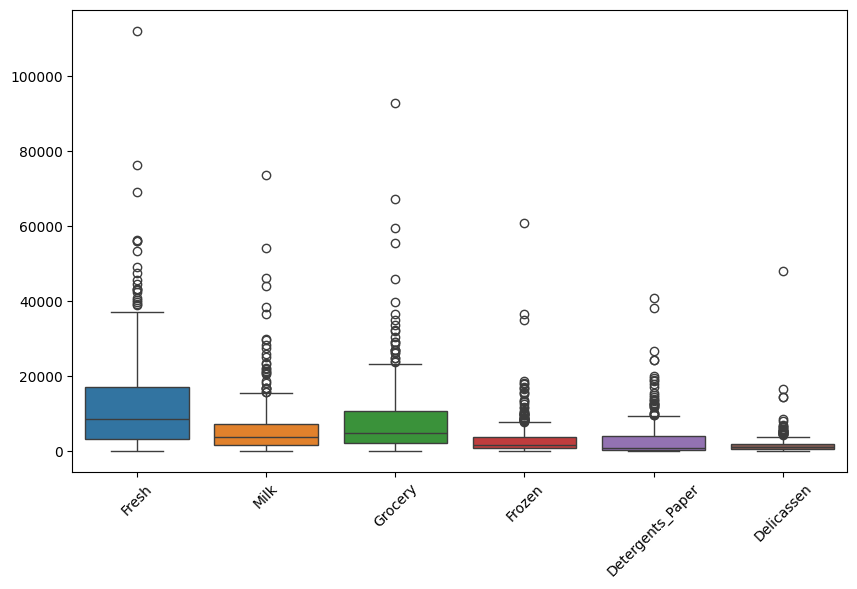

In [11]:
# Checking data distribution and outliers:
plt.figure(figsize=(10, 6))
sns.boxplot(data=raw_data[["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]])
plt.xticks(rotation=45)
plt.show()

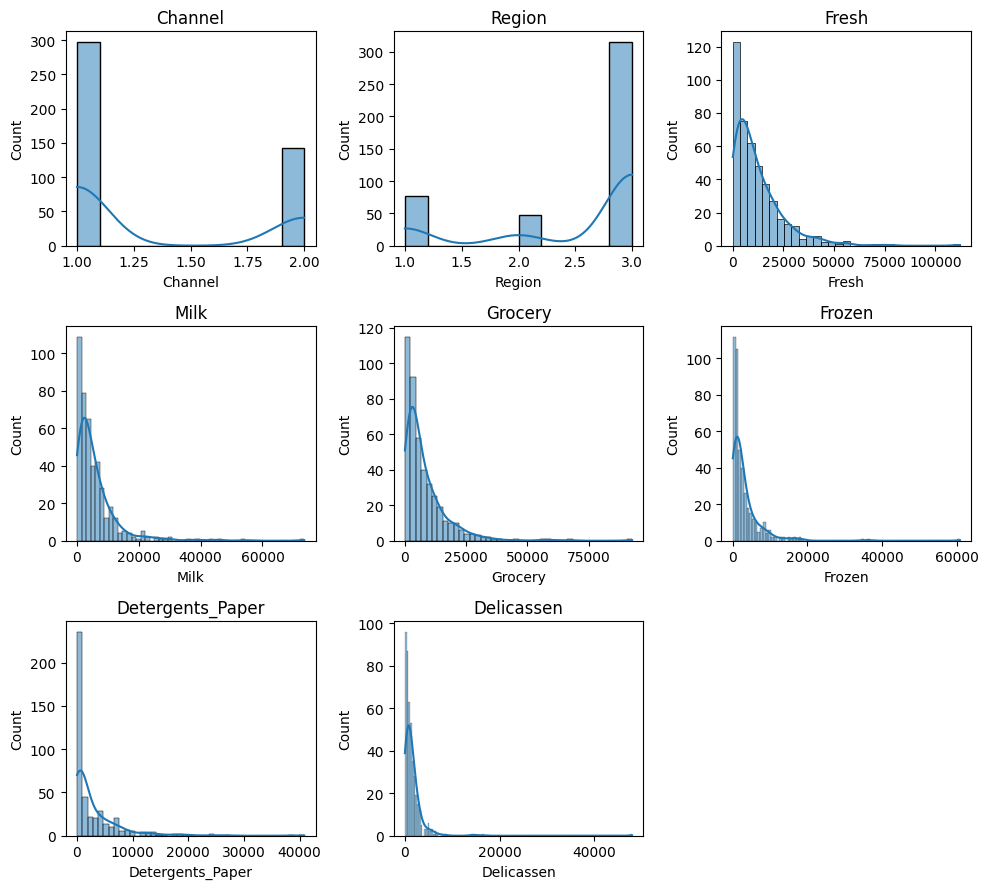

In [12]:
numeric_cols = raw_data.select_dtypes(include=['number']).columns
categorical_cols = raw_data.select_dtypes(exclude=['number']).columns

# Total number of plots
all_cols = list(raw_data.columns)
n_cols = 3  # number of grid columns
n_rows = int(np.ceil(len(all_cols) / n_cols))

plt.figure(figsize=(10, n_rows * 3))

for i, col in enumerate(all_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    if col in numeric_cols:
        # Numeric -> histogram
        sns.histplot(raw_data[col], kde=True)
    else:
        # Categorical -> count plot
        sns.countplot(x=raw_data[col], order=raw_data[col].value_counts().index)
        plt.xticks(rotation=45)
    
    plt.title(col)

plt.tight_layout()
plt.show()

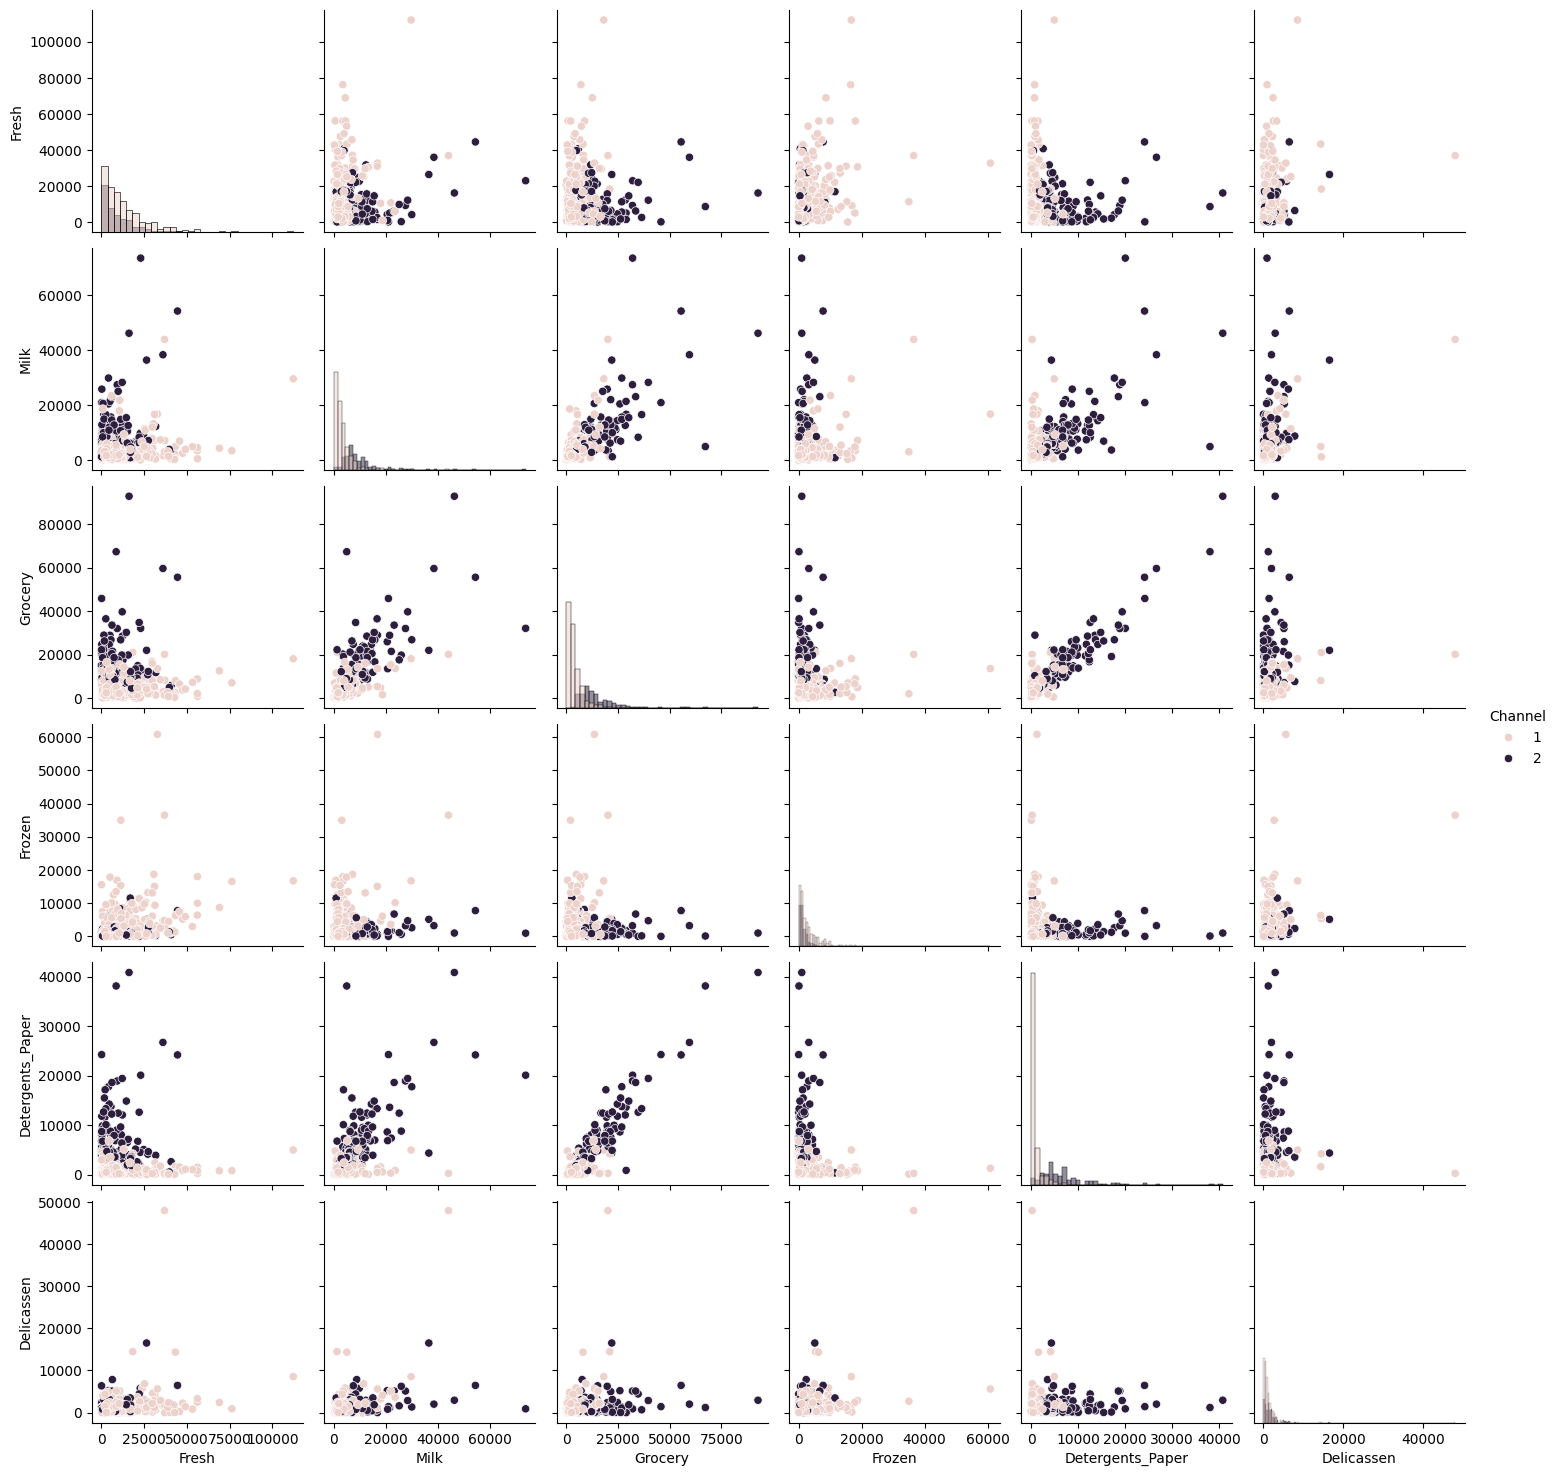

In [13]:
# Pairwise relationships (pairplot):

# hue: Channel
sns.pairplot(
    raw_data,
    vars=["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"],
    hue="Channel",
    diag_kind="hist"
)

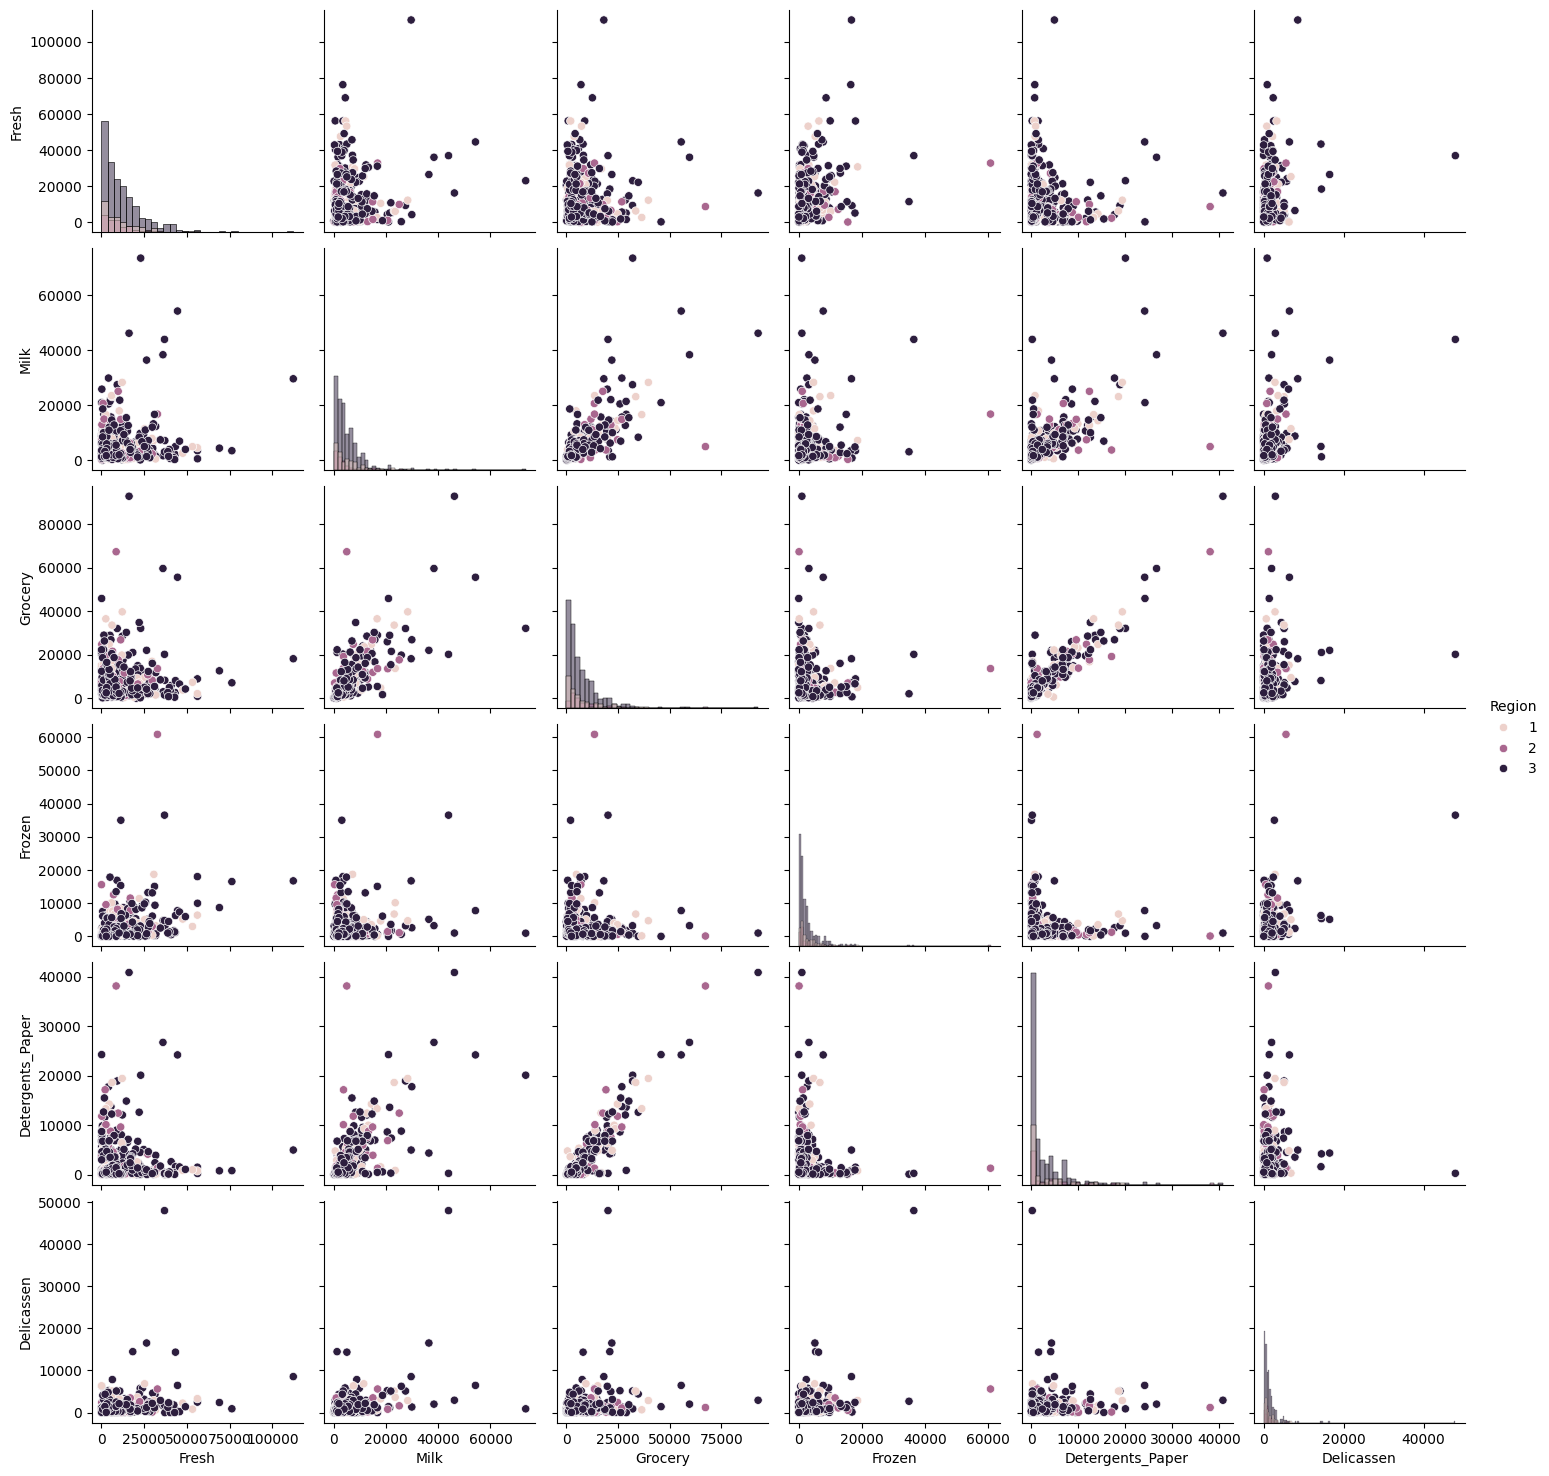

In [27]:
# hue: Region
sns.pairplot(
    raw_data,
    vars=vars_list,
    hue="Region",
    diag_kind="hist"
)

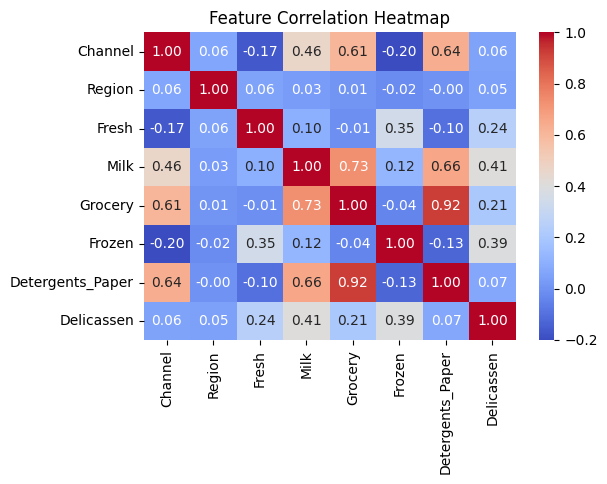

In [15]:
# Correlation heatmap:
plt.figure(figsize=(6, 4))
sns.heatmap(
    raw_data[numeric_cols].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Feature Correlation Heatmap")
plt.show()

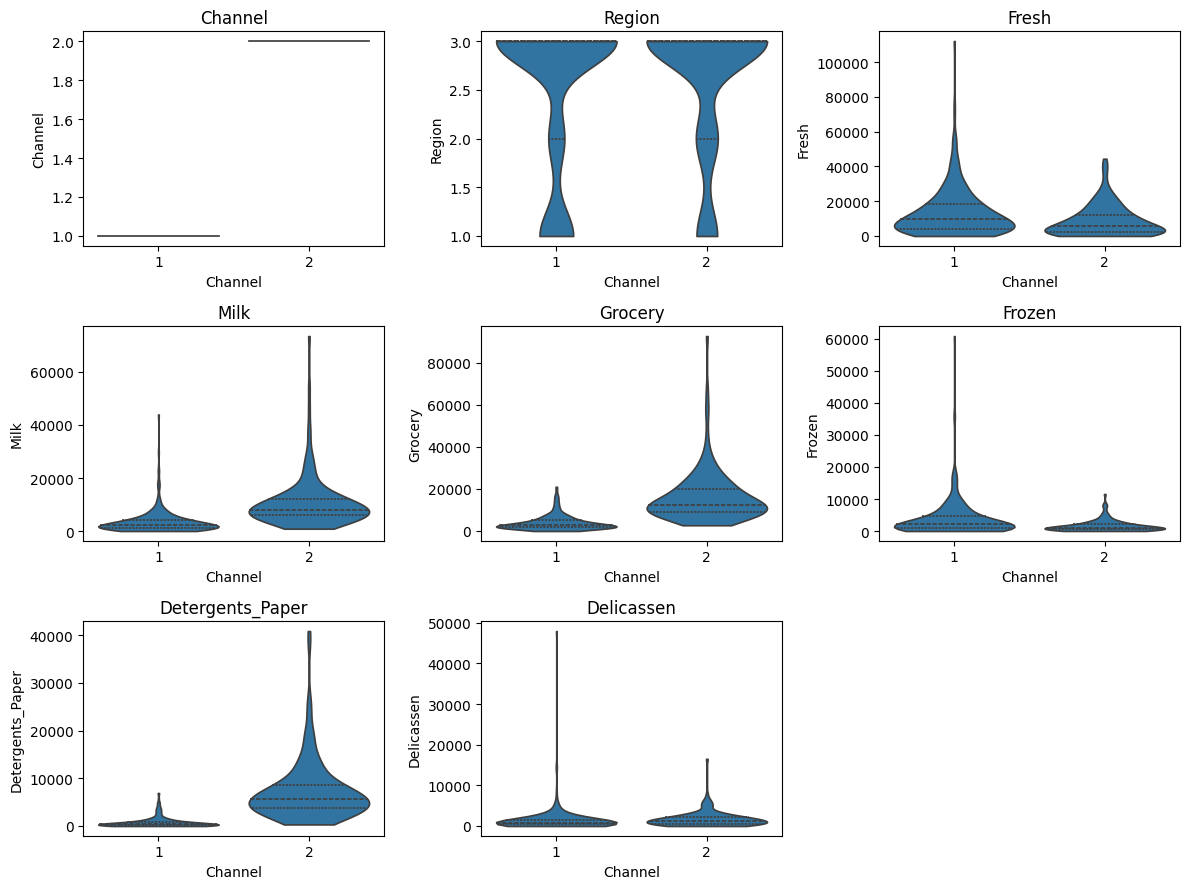

In [16]:
# Grid of violin plots per column with Channel as x
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))
axes = axes.flatten()

for idx, c in enumerate(all_cols):
    sns.violinplot(data=raw_data, x="Channel", y=c, inner="quartile", cut=0, density_norm='width', ax=axes[idx])
    axes[idx].set_title(c)
    axes[idx].set_xlabel("Channel")
    axes[idx].set_ylabel(c)

# Hide any unused subplots
for j in range(len(all_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

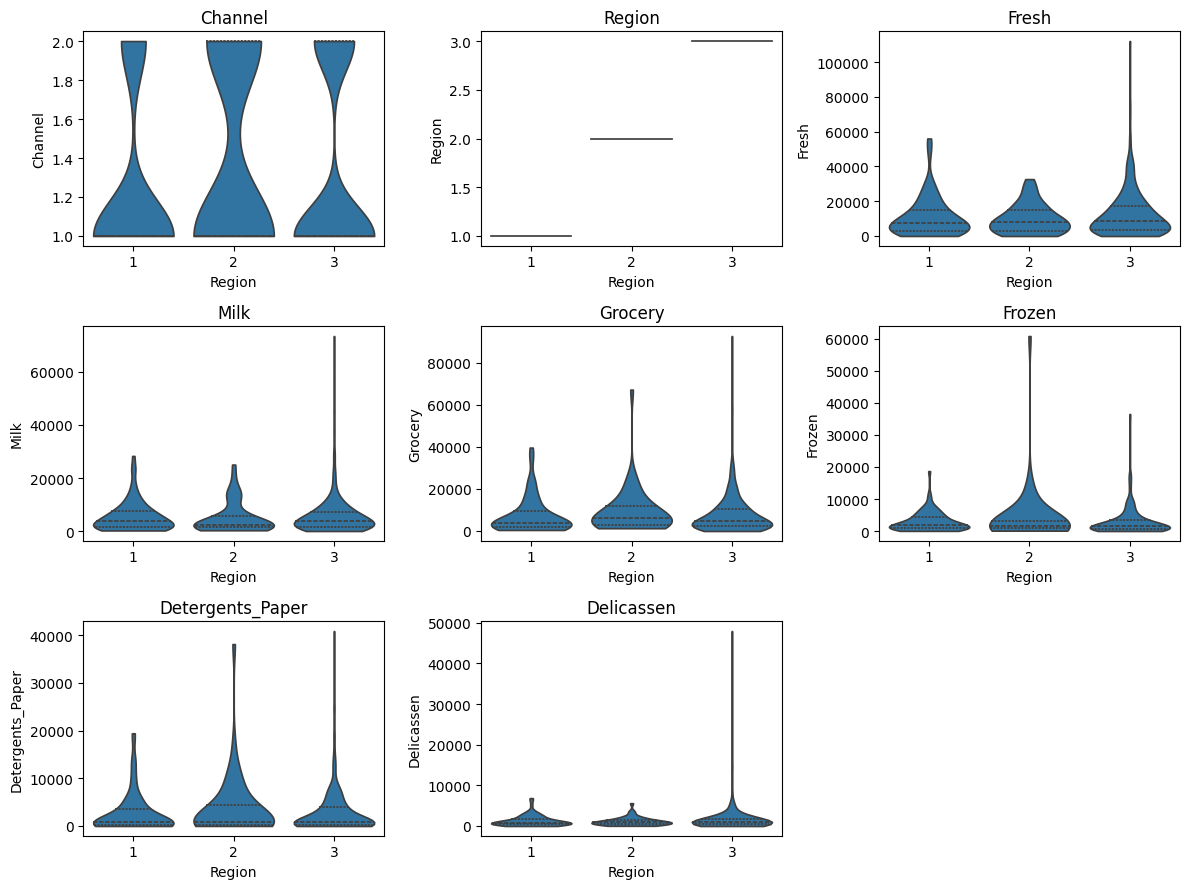

In [17]:
# Grid of violin plots per column with Region as x
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))
axes = axes.flatten()

for idx, c in enumerate(all_cols):
    sns.violinplot(data=raw_data, x="Region", y=c, inner="quartile", cut=0, density_norm='width', ax=axes[idx])
    axes[idx].set_title(c)
    axes[idx].set_xlabel("Region")
    axes[idx].set_ylabel(c)

# Hide any unused subplots
for j in range(len(all_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [18]:
data = raw_data

<h4>Preparing Data for Modelling

<h5>Scaling

In [20]:
# Data scaling:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled, columns=data.columns)
scaled_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,0.0,0.301680,1.065712,0.329952,-0.466572,0.506787,0.263810
1,1.0,0.0,-0.104810,1.092934,0.565993,0.083926,0.675670,0.574008
2,1.0,0.0,-0.155802,0.915816,0.344418,0.312589,0.736512,4.871459
3,0.0,0.0,0.344850,-0.429714,-0.062862,1.734708,-0.084442,0.582507
4,1.0,0.0,1.022092,0.315171,0.287260,0.849573,0.262056,2.988314
...,...,...,...,...,...,...,...,...
435,0.0,0.0,1.535492,1.489063,1.325630,4.128378,-0.173112,0.877125
436,0.0,0.0,2.225409,-0.388174,-0.469436,1.061166,-0.197394,0.977691
437,1.0,0.0,0.436549,2.096602,2.997560,-0.387269,3.826342,0.638456
438,0.0,0.0,0.129364,-0.290954,-0.296786,-0.173542,-0.176932,0.821176


<h5>K-Means Clustering

In [21]:
from sklearn.cluster import KMeans

In [24]:
kmeans_5 = KMeans(n_clusters=5, random_state=13)
kmeans_5.fit(scaled_df)
data['Kmeans_Cluster_5'] = kmeans_5.labels_
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Kmeans_Cluster_5
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,3
4,2,3,22615,5410,7198,3915,1777,5185,3
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,3
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,3


Text(0.5, 0.98, 'K-Mean Clustering, K = 5')

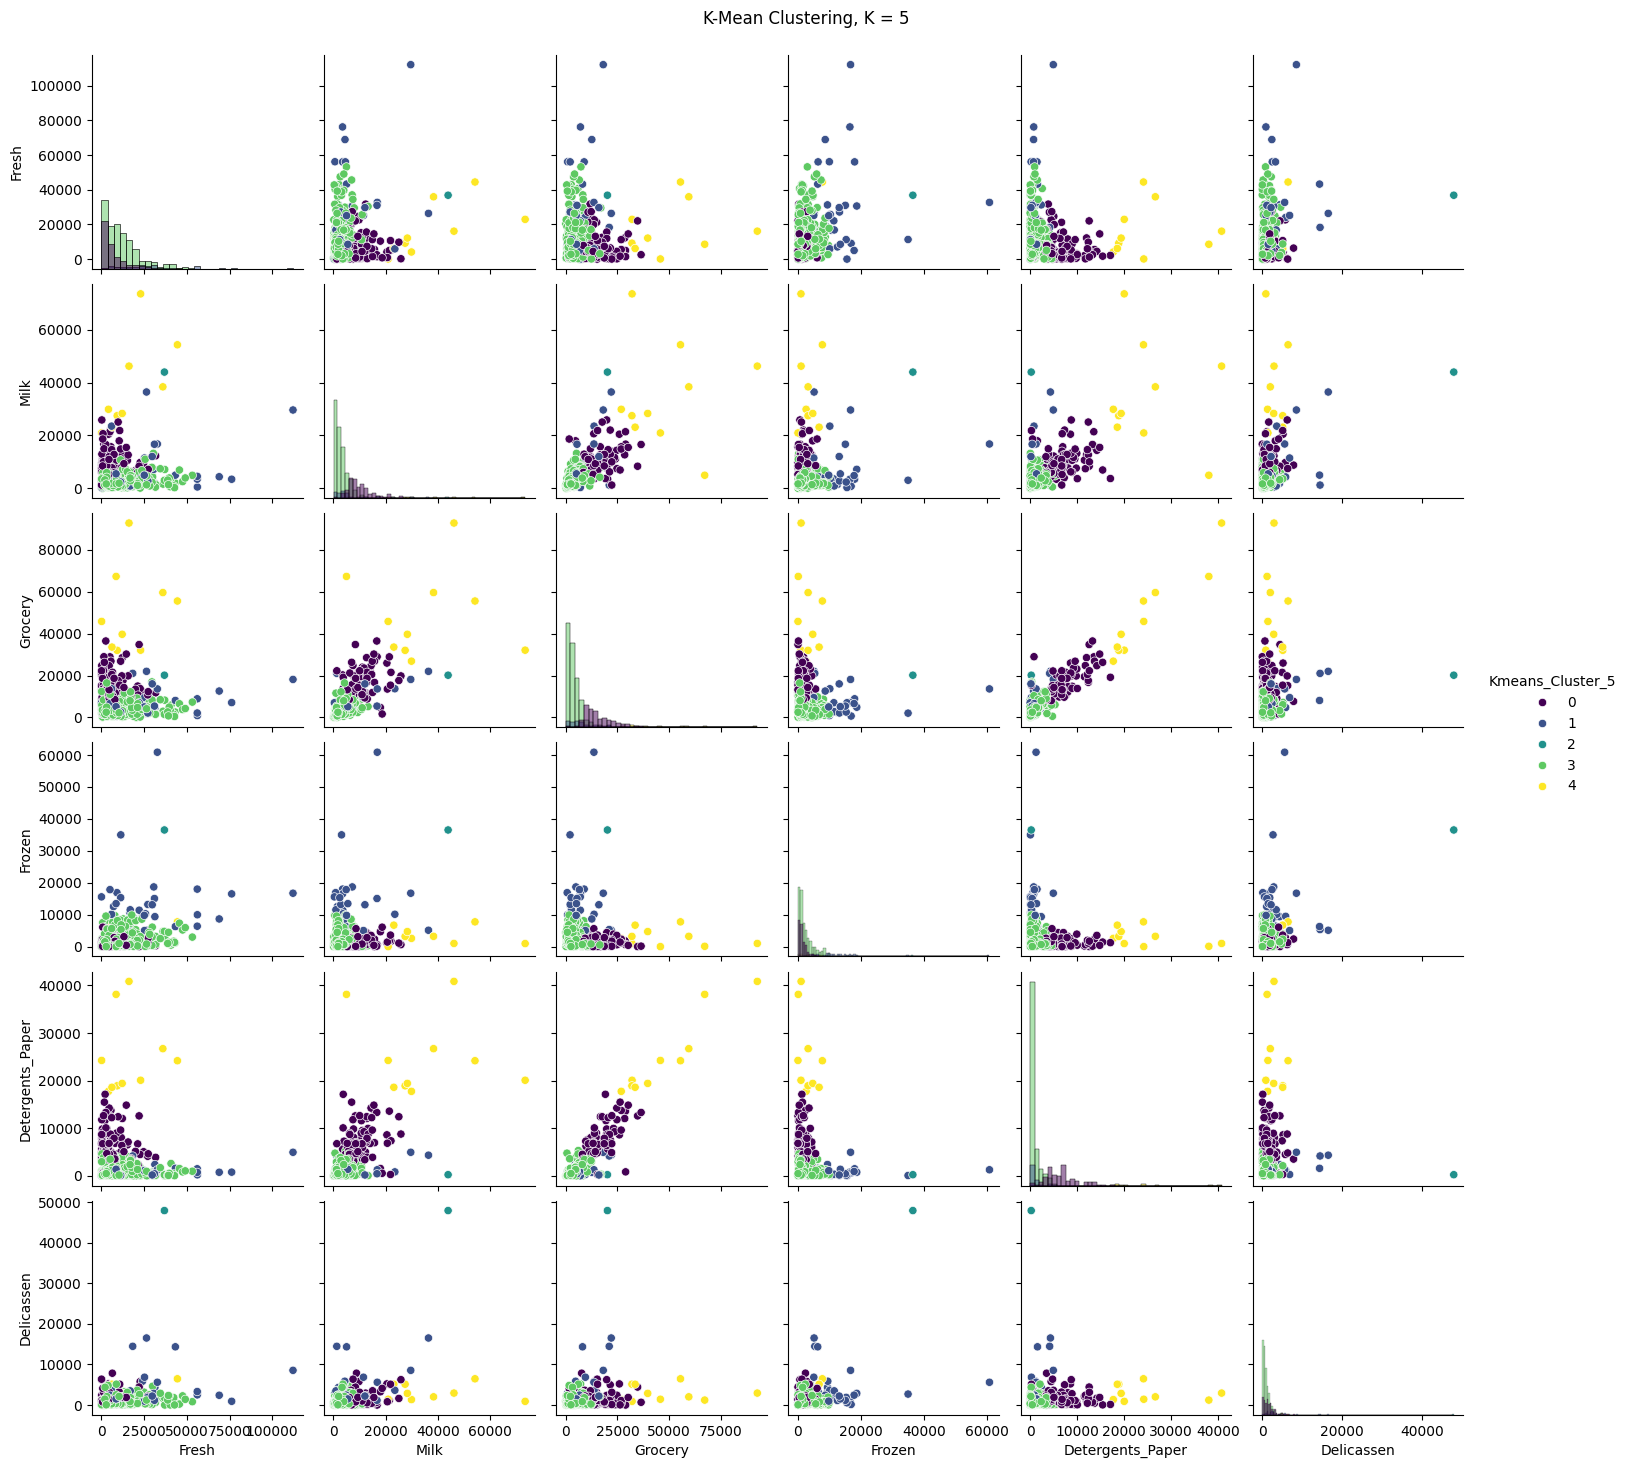

In [39]:
plot = sns.pairplot(
    data,
    vars=vars_list,
    hue="Kmeans_Cluster_5",
    diag_kind="hist",
    palette="viridis"
)
plot.figure.subplots_adjust(top=0.95)
plot.figure.suptitle("K-Mean Clustering, K = 5")

<h5>Hierarchial Clustering

In [32]:
from sklearn.cluster import AgglomerativeClustering

In [33]:
# K = 5
agglo_5 = AgglomerativeClustering(n_clusters=5)
data['Agglo_Cluster_5'] = agglo_5.fit_predict(scaled_df)

Text(0.5, 0.98, 'Agglomerative Hierarchial Clustering (K=5)')

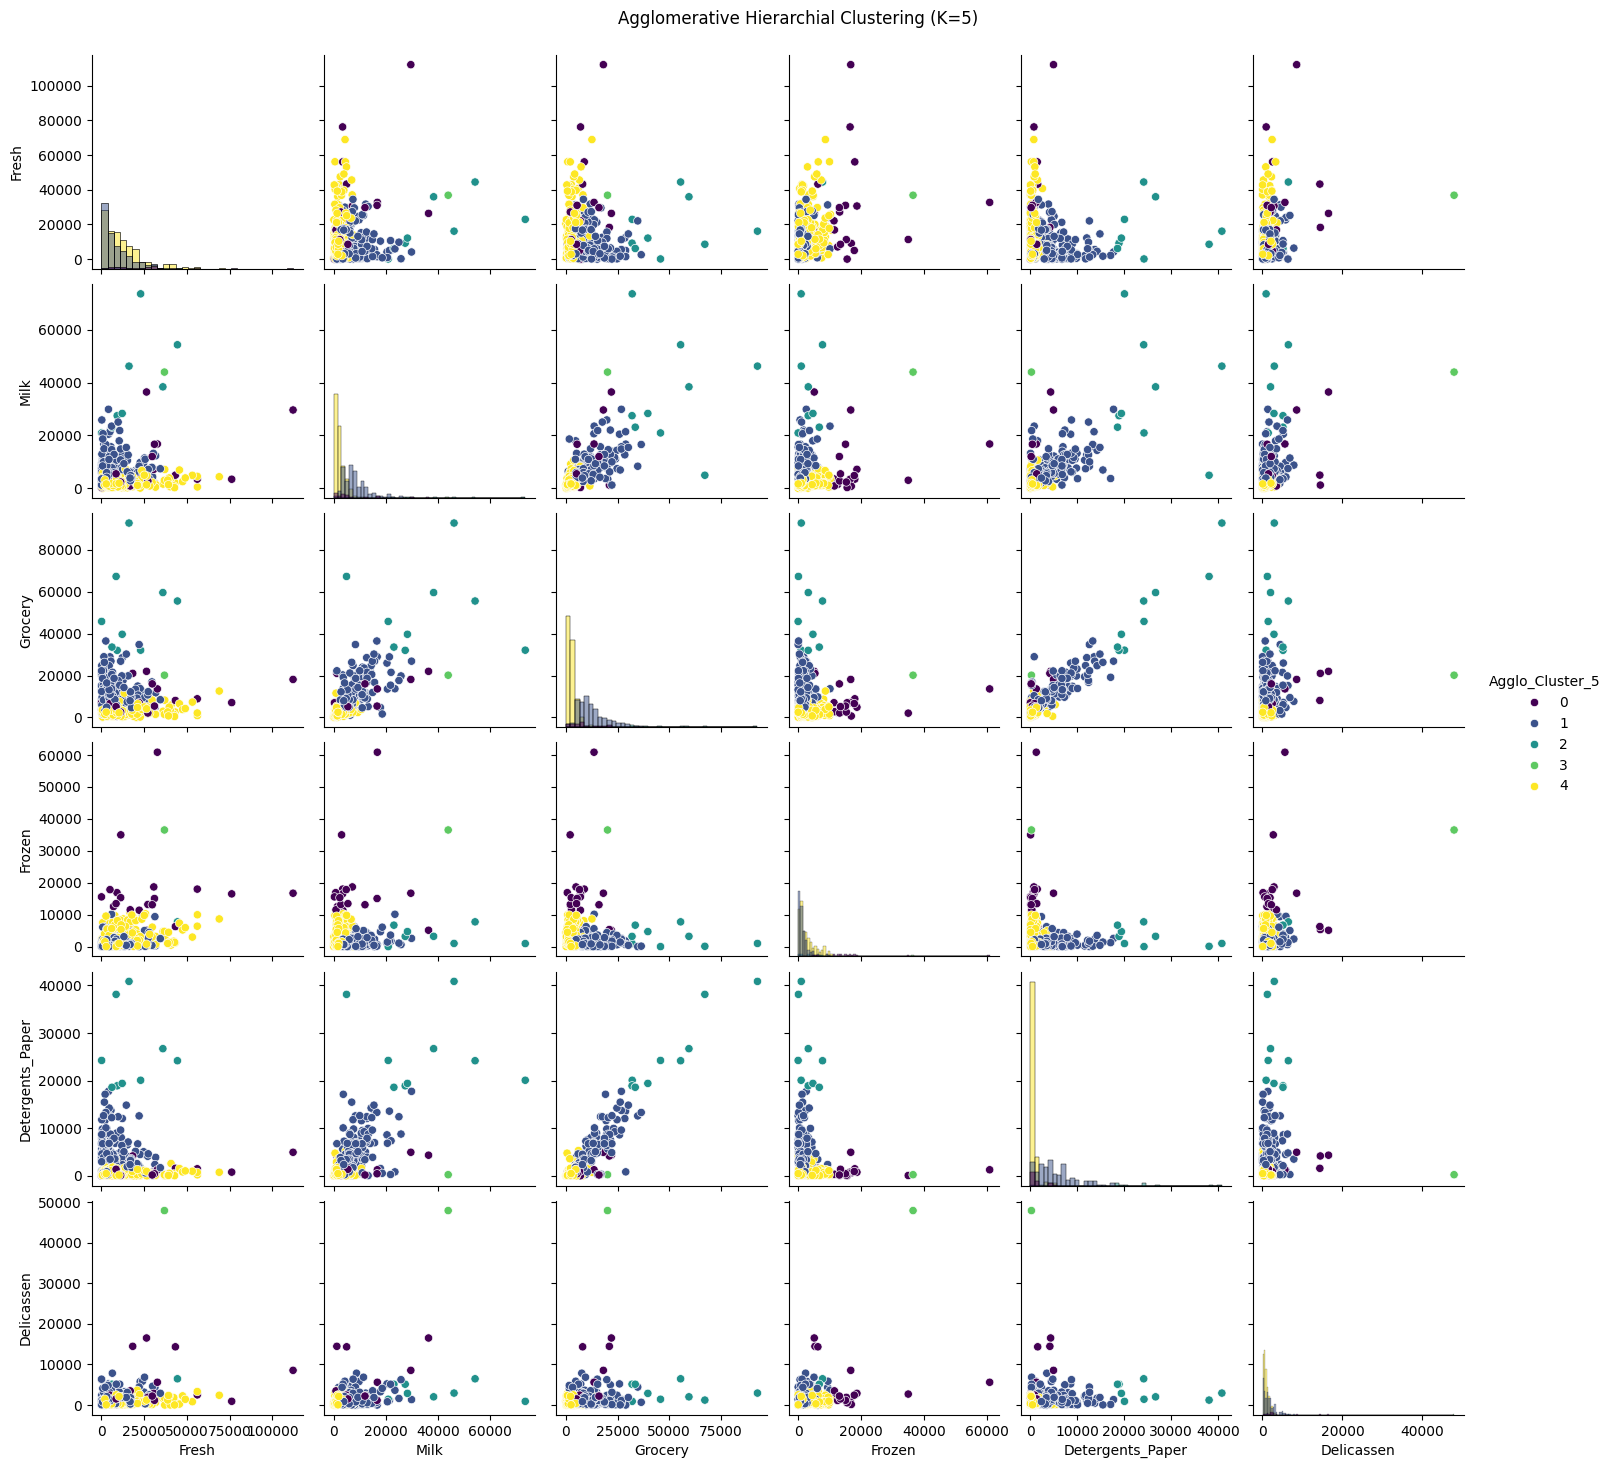

In [38]:
plot = sns.pairplot(
    data,
    vars=vars_list,
    hue="Agglo_Cluster_5",
    diag_kind="hist",
    palette="viridis"
)

plot.figure.subplots_adjust(top=0.95)
plot.figure.suptitle("Agglomerative Hierarchial Clustering (K=5)")

<h5>Dendrogram

In [40]:
from scipy.cluster.hierarchy import dendrogram, linkage

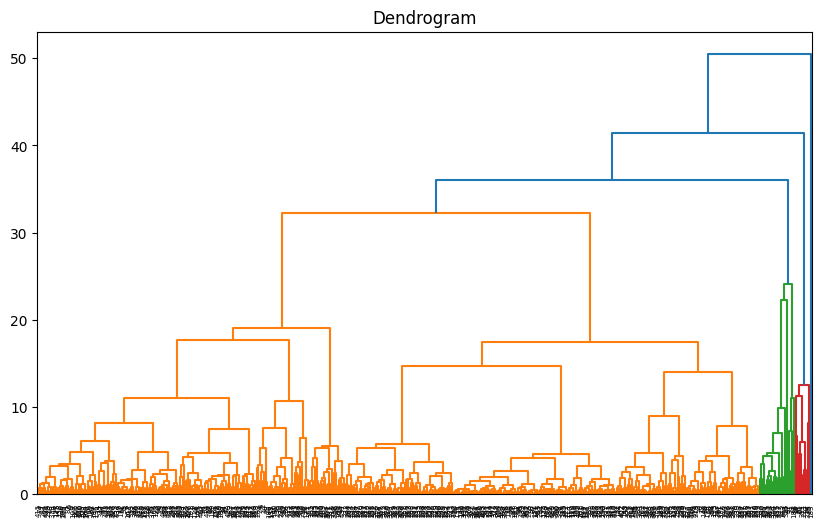

In [41]:
linked = linkage(scaled_df, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.show()

<h5>DBSCAN Clustering

In [42]:
from sklearn.cluster import DBSCAN

In [43]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_df)

Text(0.5, 0.98, 'DBSCAN Clustering')

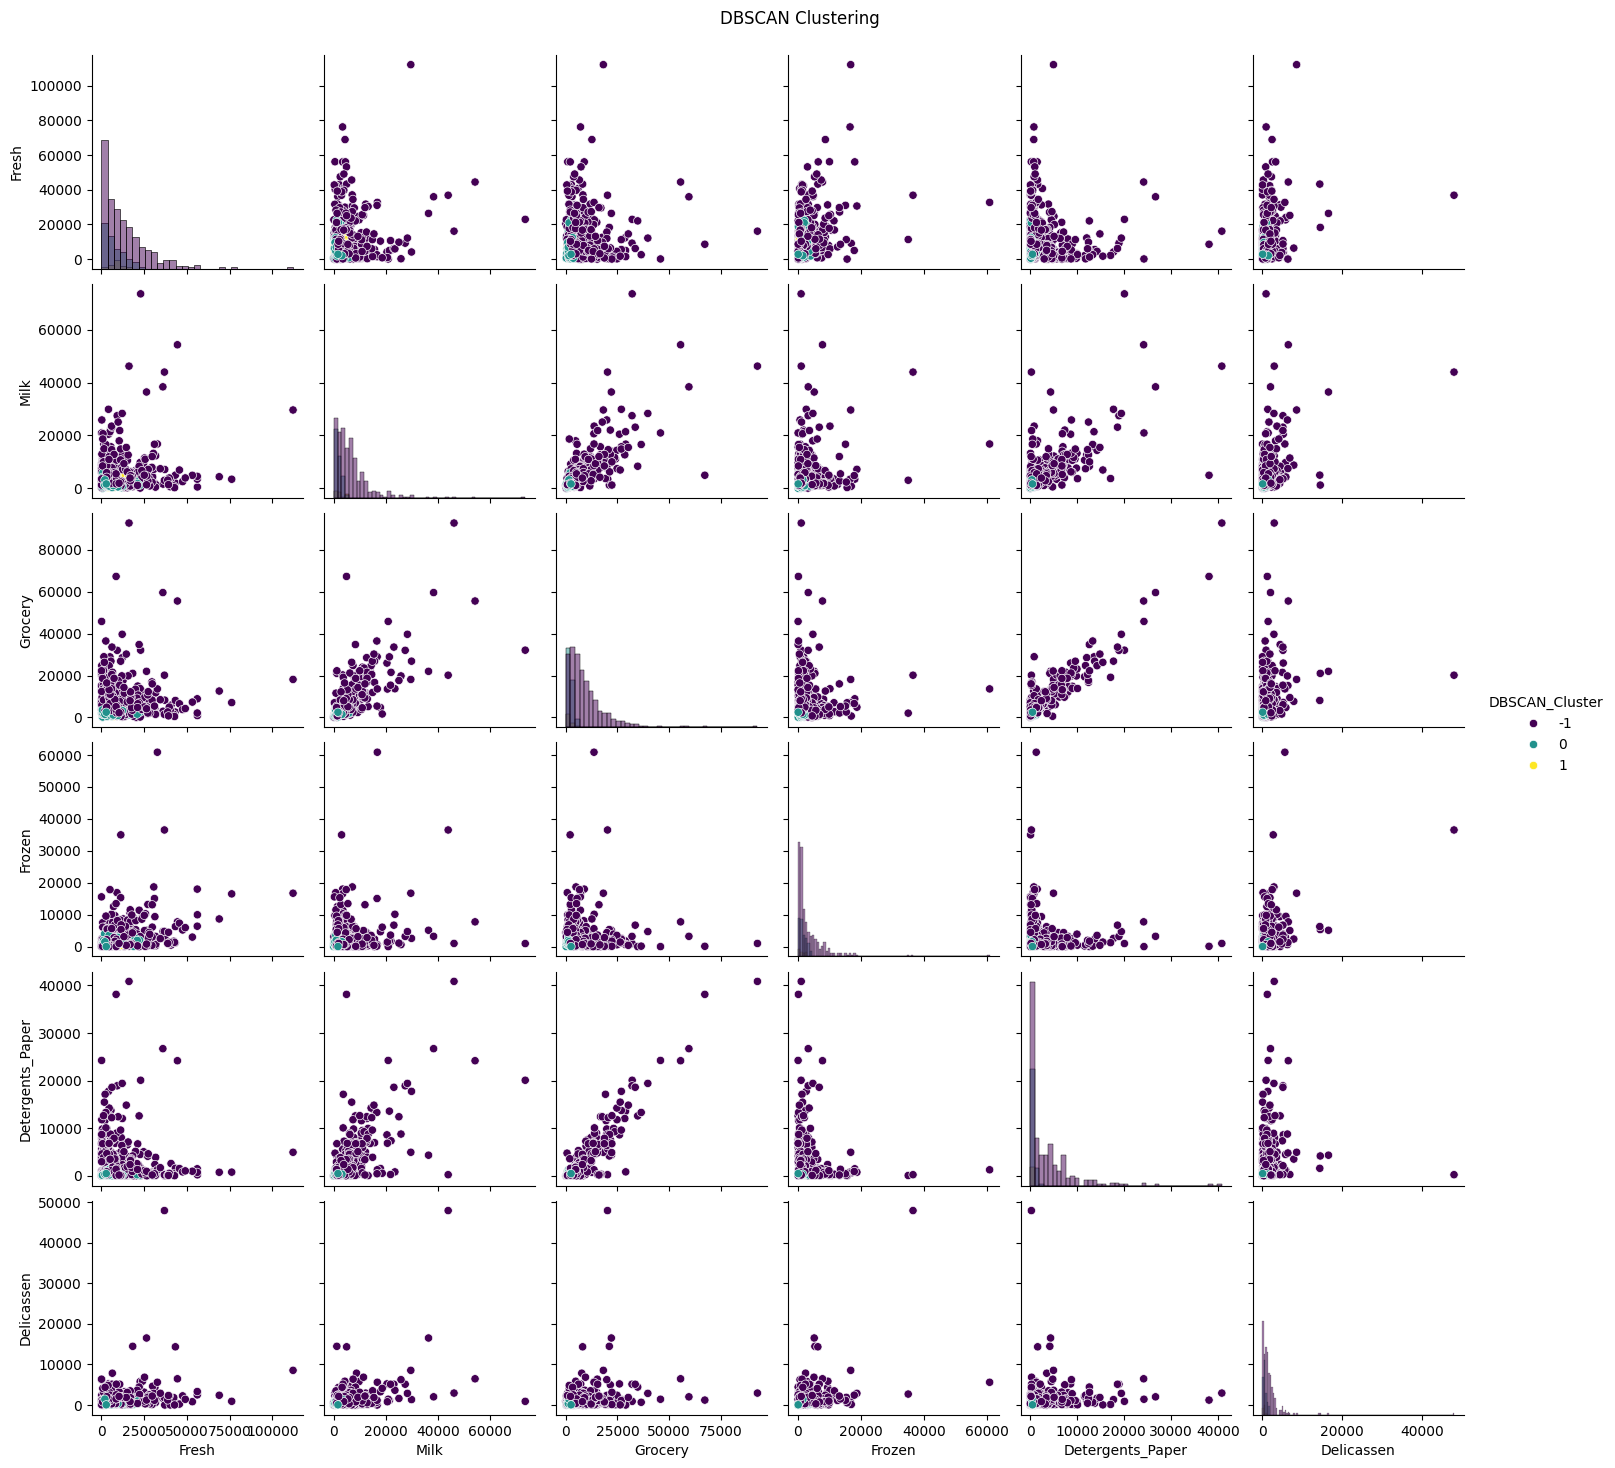

In [44]:
plot = sns.pairplot(
    data,
    vars=vars_list,
    hue="DBSCAN_Cluster",
    diag_kind="hist",
    palette="viridis"
)

plot.figure.subplots_adjust(top=0.95)
plot.figure.suptitle("DBSCAN Clustering")

In [45]:
# Only found 3 clusters.

<h4>Model Comparisons

In [46]:
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score
)

/var/folders/bw/y81spjm11x78s7y1l9x977qc0000gn/T/ipykernel_80054/2147525346.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=sil_scores, palette='viridis')


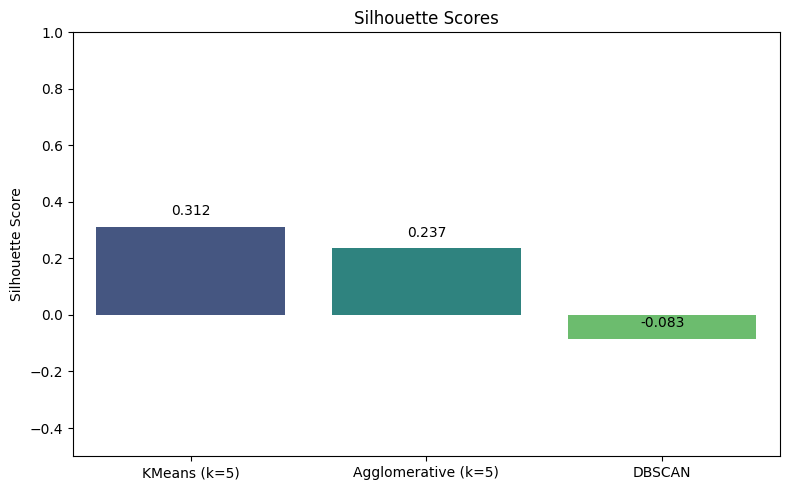

In [48]:
# Silhouette scores for KMeans (k=5), Agglomerative (k=5), and DBSCAN
km5_sil = silhouette_score(scaled_df, data['Kmeans_Cluster_5'])
agg5_sil = silhouette_score(scaled_df, data['Agglo_Cluster_5'])
dab_sil = silhouette_score(scaled_df, data['DBSCAN_Cluster'])

models = ['KMeans (k=5)', 'Agglomerative (k=5)', 'DBSCAN']
sil_scores = [km5_sil, agg5_sil, dab_sil]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=sil_scores, palette='viridis')
plt.title('Silhouette Scores')
plt.ylabel('Silhouette Score')
plt.ylim(-0.5, 1)

for idx, val in enumerate(sil_scores):
    if not np.isnan(val):
        plt.text(idx, val + 0.03, f'{val:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# Negative value for DBSCAN implies misclustering...
# Higher the better. Greater clustering for KMeans and agglo methods vs DBSCAN.

/var/folders/bw/y81spjm11x78s7y1l9x977qc0000gn/T/ipykernel_80054/4038242232.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=ch_scores, palette='viridis')


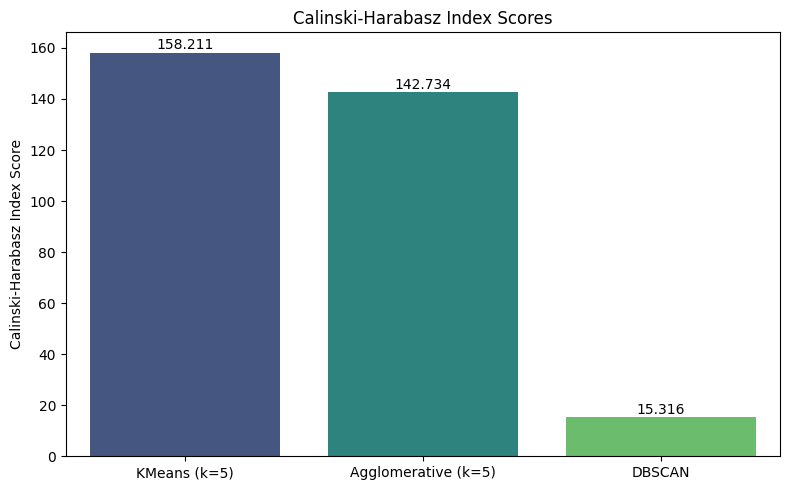

In [50]:
# Calinski-Harabasz Indexes for KMeans (k=5), Agglomerative (k=5), and DBSCAN
km5_ch = calinski_harabasz_score(scaled_df, data['Kmeans_Cluster_5'])
agg5_ch = calinski_harabasz_score(scaled_df, data['Agglo_Cluster_5'])
dab_ch = calinski_harabasz_score(scaled_df, data['DBSCAN_Cluster'])

models = ['KMeans (k=5)', 'Agglomerative (k=5)', 'DBSCAN']
ch_scores = [km5_ch, agg5_ch, dab_ch]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=ch_scores, palette='viridis')
plt.title('Calinski-Harabasz Index Scores')
plt.ylabel('Calinski-Harabasz Index Score')

for idx, val in enumerate(ch_scores):
    if not np.isnan(val):
        plt.text(idx, val + 0.03, f'{val:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [51]:
# Much higher values for KMeans and agglo clustering methods compared to DBSCAN.

/var/folders/bw/y81spjm11x78s7y1l9x977qc0000gn/T/ipykernel_80054/915941700.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=db_scores, palette='viridis')


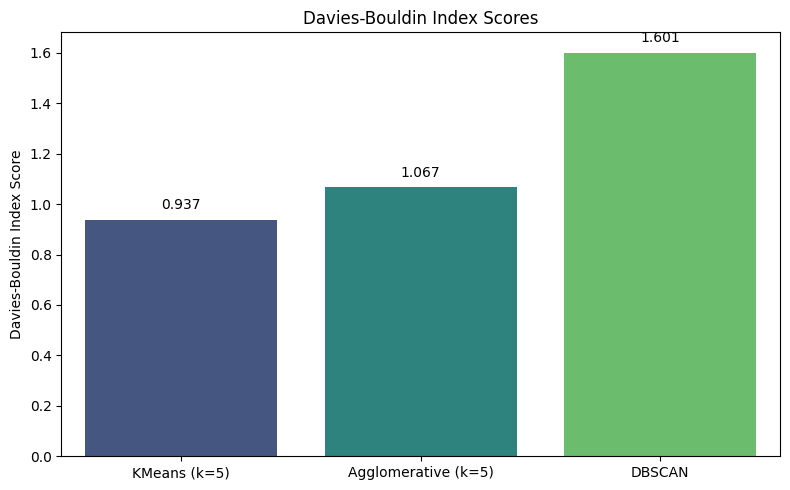

In [52]:
# Davies-Bouldin Indexes for KMeans (k=5), Agglomerative (k=5), and DBSCAN
km5_db = davies_bouldin_score(scaled_df, data['Kmeans_Cluster_5'])
agg5_db = davies_bouldin_score(scaled_df, data['Agglo_Cluster_5'])
dab_db = davies_bouldin_score(scaled_df, data['DBSCAN_Cluster'])

models = ['KMeans (k=5)', 'Agglomerative (k=5)', 'DBSCAN']
db_scores = [km5_db, agg5_db, dab_db]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=db_scores, palette='viridis')
plt.title('Davies-Bouldin Index Scores')
plt.ylabel('Davies-Bouldin Index Score')

for idx, val in enumerate(db_scores):
    if not np.isnan(val):
        plt.text(idx, val + 0.03, f'{val:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# Lower the better. Greater clustering for KMeans and agglo methods vs DBSCAN.

In [53]:
# For both datasets explored overall, KMeans seems to give the best clustering performance.